In [13]:
import pandas as pd
import pydataset as ds
from sklearn.linear_model import LinearRegression

In [7]:
cars = ds.data('mtcars')[["disp", "hp"]]
cars.head()

,disp,hp
Mazda RX4,160.0,110
Mazda RX4 Wag,160.0,110
Datsun 710,108.0,93
Hornet 4 Drive,258.0,110
Hornet Sportabout,360.0,175


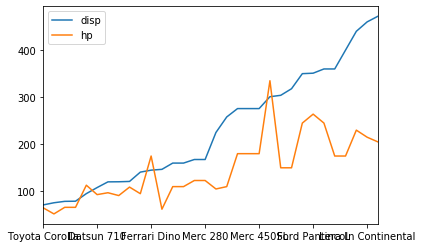

In [10]:
cars.sort_values("disp", ascending = True).plot()

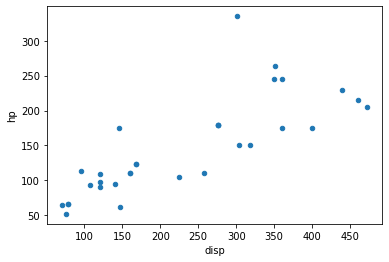

In [11]:
cars.plot.scatter(x = "disp", y = "hp")

In [14]:
model_reg = LinearRegression()

In [16]:
model_reg.fit(X = cars[["disp"]], y = cars.hp)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print(model_reg.coef_)
print(model_reg.intercept_)

[0.43755265]
45.73453220753733


In [19]:
model_reg.predict(X = cars[["disp"]])

array([115.74295619, 115.74295619,  92.9902184 , 158.62311588,
       203.25348617, 144.18387843, 203.25348617, 109.92350595,
       107.34194531, 119.06835633, 119.06835633, 166.41155305,
       166.41155305, 166.41155305, 252.25938295, 247.00875115,
       238.25769816,  80.16992575,  78.8572678 ,  76.84452561,
        98.28460546, 184.87627487, 178.75053777, 198.87795967,
       220.75559216,  80.30119155,  98.37211599,  87.34578921,
       199.31551232, 109.17966644, 177.43787982,  98.67840284])

In [21]:
cars["predicted"] = model_reg.predict(X = cars[["disp"]])
cars.head()

,disp,hp,predicted
Mazda RX4,160.0,110,115.742956
Mazda RX4 Wag,160.0,110,115.742956
Datsun 710,108.0,93,92.990218
Hornet 4 Drive,258.0,110,158.623116
Hornet Sportabout,360.0,175,203.253486


In [24]:
cars["model_error"] = abs(cars.hp - cars.predicted)
cars.head()

,disp,hp,predicted,model_error
Mazda RX4,160.0,110,115.742956,5.742956
Mazda RX4 Wag,160.0,110,115.742956,5.742956
Datsun 710,108.0,93,92.990218,0.009782
Hornet 4 Drive,258.0,110,158.623116,48.623116
Hornet Sportabout,360.0,175,203.253486,28.253486


In [25]:
model_reg.score(X = cars[["disp"]], y = cars.hp)

0.6255996662803951

In [26]:
cars = ds.data('mtcars')[["disp", "wt", "gear", "qsec"]]
cars.head()

,disp,wt,gear,qsec
Mazda RX4,160.0,2.620,4,16.46
Mazda RX4 Wag,160.0,2.875,4,17.02
Datsun 710,108.0,2.320,4,18.61
Hornet 4 Drive,258.0,3.215,3,19.44
Hornet Sportabout,360.0,3.440,3,17.02


In [30]:
model_more = LinearRegression()
model_more.fit(X = cars.drop(columns = ['qsec']), y = cars.qsec)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print(model_more.coef_)
print(model_more.intercept_)

[-0.02041983  1.38374669 -1.35043374]
23.087916775123727


In [32]:
model_more.score(X = cars.drop(columns = ['qsec']), y = cars.qsec)

0.6004434802192848